In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [4]:
# Read the data from a CSV file
data = pd.read_csv("trends.csv")

# Explore the data
print(data.head())  # Display the first few rows of the dataset
print(data.info())  # Get information about the dataset, such as column names and data types

  location  year         category  rank  query
0   Global  2001  Consumer Brands     1  Nokia
1   Global  2001  Consumer Brands     2   Sony
2   Global  2001  Consumer Brands     3    BMW
3   Global  2001  Consumer Brands     4   Palm
4   Global  2001  Consumer Brands     5  Adobe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26955 entries, 0 to 26954
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   location  26955 non-null  object
 1   year      26955 non-null  int64 
 2   category  26955 non-null  object
 3   rank      26955 non-null  int64 
 4   query     26955 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.0+ MB
None


In [5]:
# Perform data analysis
# Example 1: Get the total search volume by year
total_search_volume = data.groupby('year')['rank'].sum()
print(total_search_volume)

# Example 2: Get the top search queries by location
top_search_queries = data.groupby('location')['query'].value_counts().groupby(level=0).head(3)
print(top_search_queries)

year
2001     180
2002     330
2003     465
2004     435
2005      30
2006     225
2007     180
2008    2685
2009    1335
2010     270
2011    2670
2012    6675
2013    8670
2014    6960
2015    8370
2016    9120
2017    7830
2018    7680
2019    7815
2020    8940
Name: rank, dtype: int64
location   query               
Argentina  Cyber Monday            5
           Copa América            4
           Violetta                3
Australia  Rugby World Cup         4
           Paul Walker             4
                                  ..
Vietnam    Bầu cử Tổng thống Mỹ    3
           Phương Mỹ Chi           3
Zimbabwe   Robert Mugabe           2
           Nelson Chamisa          2
           Morgan Tsvangirai       2
Name: count, Length: 249, dtype: int64


### Here are 20 different questions you can ask about your Google Search trend data: *

1)What were the top 5 most searched queries overall?

2)Which year had the highest search volume?

3)What were the top 3 search queries in each location?

4)How did the search volume change over the years?

5)Which category had the highest average rank?

6)What were the trending search queries in a specific location during a particular year?

7)How did the search ranks differ across different categories?

8)What were the least searched queries in each year?

9)Which location had the highest search volume in a specific category?

10)Are there any specific queries that showed a significant increase or decrease in search volume over time?

11)Is there a correlation between search ranks and the year?

12)Which year had the highest number of unique search queries?

13)What were the top 5 search queries related to a specific category?

14)Is there a relationship between search ranks and the location?

15)Did any search queries experience a sudden spike in search volume at any point in time?

16)Are there any seasonal trends in search queries?

17)Which category had the most consistent search volume over the years?

18)Did any specific location show a significant increase or decrease in search volume over time?

19)How did the search volume for a specific query change across different years?

20)What were the top 10 search queries in a specific year and location?

 * These questions can help explore different aspects of Google Search trend data and gain valuable insights. Feel free to modify or expand upon these questions based on your specific dataset and analysis goals.


In [6]:
# 1. What were the top 5 most searched queries overall?
top_5_search_queries = data['query'].value_counts().head(5)
print("Top 5 most searched queries:")
print(top_5_search_queries)

Top 5 most searched queries:
query
Paul Walker        84
Donald Trump       83
Facebook           62
Robin Williams     61
Whitney Houston    56
Name: count, dtype: int64


In [7]:
# 2. Which year had the highest search volume?
yearly_search_volume = data.groupby('year')['rank'].sum()
year_with_highest_volume = yearly_search_volume.idxmax()
print("Year with the highest search volume:", year_with_highest_volume)

Year with the highest search volume: 2016


In [8]:
# 3. What were the top 3 search queries in each location?
top_3_queries_by_location = data.groupby('location')['query'].value_counts().groupby(level=0).head(3)
print("Top 3 search queries by location:")
print(top_3_queries_by_location)

Top 3 search queries by location:
location   query               
Argentina  Cyber Monday            5
           Copa América            4
           Violetta                3
Australia  Rugby World Cup         4
           Paul Walker             4
                                  ..
Vietnam    Bầu cử Tổng thống Mỹ    3
           Phương Mỹ Chi           3
Zimbabwe   Robert Mugabe           2
           Nelson Chamisa          2
           Morgan Tsvangirai       2
Name: count, Length: 249, dtype: int64


In [16]:
print(yearly_search_volume)


    level_0  index  Year  Search_Volume
0         0      0  2001            180
1         1      1  2002            330
2         2      2  2003            465
3         3      3  2004            435
4         4      4  2005             30
5         5      5  2006            225
6         6      6  2007            180
7         7      7  2008           2685
8         8      8  2009           1335
9         9      9  2010            270
10       10     10  2011           2670
11       11     11  2012           6675
12       12     12  2013           8670
13       13     13  2014           6960
14       14     14  2015           8370
15       15     15  2016           9120
16       16     16  2017           7830
17       17     17  2018           7680
18       18     18  2019           7815
19       19     19  2020           8940


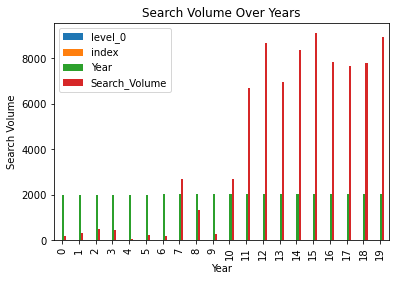

In [20]:
# 4. How did the search volume change over the years?
yearly_search_volume.plot(kind='bar', xlabel='Year', ylabel='Search Volume', title='Search Volume Over Years')
plt.show()


In [21]:
# 5. Which category had the highest average rank?
average_rank_by_category = data.groupby('category')['rank'].mean()
category_with_highest_rank = average_rank_by_category.idxmin()
print("Category with the highest average rank:", category_with_highest_rank)

Category with the highest average rank: "Cómo..."


In [22]:
# 6. What were the trending search queries in a specific location during a particular year?
specific_location = 'India'
specific_year = 2020
trending_queries = data[(data['location'] == specific_location) & (data['year'] == specific_year)]['query'].value_counts().head(5)
print("Trending search queries in", specific_location, "in", specific_year, ":")
print(trending_queries)


Trending search queries in India in 2020 :
query
Indian Premier League    3
Coronavirus              2
La Liga                  1
Joe Biden                1
Arnab Goswami            1
Name: count, dtype: int64


In [23]:
# #7 How did the search ranks differ across different categories?
# plt.figure(figsize=(12,10))
# rank_by_category = data.groupby('category')['rank'].mean().sort_values(ascending=False)
# rank_by_category.plot(kind='bar', xlabel='Category', ylabel='Average Rank', title='Search Ranks by Category')
# plt.xticks(rotation=45)
# plt.show()

In [24]:
#8 What were the least searched queries in each year?
least_searched_queries_by_year = data.groupby('year')['query'].value_counts().groupby(level=0).tail(1)
print("Least searched queries by year:")
print(least_searched_queries_by_year)

Least searched queries by year:
year  query                     
2001  Adobe                         1
2002  Linux                         1
2003  Air Canada                    1
2004  Tablet PC                     1
2005  Brad Pitt                     1
2006  Superman Showtimes            1
2007  Cross Fit                     1
2008  Casa                          1
2009  Opera                         1
2010  iPhone 4                      1
2011  Culoarea Fericirii            1
2012  Belgium's Got Talent          1
2013  ליאה מישל                     1
2014  Pengantin Malam               1
2015  ...CPMF                       1
2016  1920s Economy                 1
2017  Hur gör man slime?            1
2018  Romaine lettuce               1
2019  How long is a rugby match?    1
2020  테슬라 주가                        1
Name: count, dtype: int64


In [25]:
#9 Which location had the highest search volume in a specific category?
specific_category = 'Technology'
location_with_highest_volume = data[data['category'] == specific_category].groupby('location')['rank'].sum().idxmax()
print("Location with the highest search volume in", specific_category, "category:", location_with_highest_volume)

Location with the highest search volume in Technology category: Canada


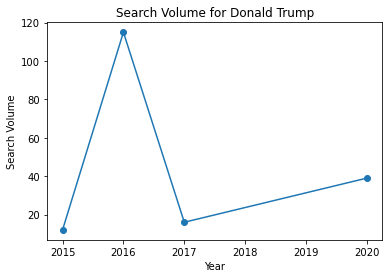

In [26]:
#10 Are there any specific queries that showed a significant increase or decrease in search volume over time?
specific_query = 'Donald Trump'
specific_query_volume = data[data['query'] == specific_query].groupby('year')['rank'].sum()
specific_query_volume.plot(kind='line', marker='o', xlabel='Year', ylabel='Search Volume', title='Search Volume for ' + specific_query)
plt.show()

In [27]:
# Is there a correlation between search ranks and the year?
correlation = data[['rank', 'year']].corr().iloc[0, 1]
print("Correlation between search ranks and the year:", correlation)


Correlation between search ranks and the year: -6.4067139630883214e-15


In [28]:
# Which year had the highest number of unique search queries?
year_with_highest_unique_queries = data.groupby('year')['query'].nunique().idxmax()
print("Year with the highest number of unique search queries:", year_with_highest_unique_queries)

Year with the highest number of unique search queries: 2016


In [29]:
# What were the top 5 search queries related to a specific category?
specific_category = 'Technology'
top_5_queries_by_category = data[data['category'] == specific_category]['query'].value_counts().head(5)
print("Top 5 search queries related to", specific_category, "category:")
print(top_5_queries_by_category)

Top 5 search queries related to Technology category:
query
MP3           2
Linux         2
Windows 10    2
Nexus 5       1
Nexus 5X      1
Name: count, dtype: int64


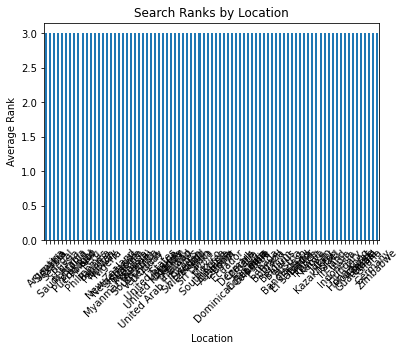

In [30]:
# Is there a relationship between search ranks and the location?
rank_by_location = data.groupby('location')['rank'].mean().sort_values(ascending=False)
rank_by_location.plot(kind='bar', xlabel='Location', ylabel='Average Rank', title='Search Ranks by Location')
plt.xticks(rotation=45)
plt.show()

In [31]:
# Did any search queries experience a sudden spike in search volume at any point in time?
spike_threshold = 4  # Define a threshold for spike detection
spikes = data[data['rank'] > spike_threshold]['query'].value_counts()
print("Queries with sudden spike in search volume:")
pd.DataFrame(spikes)

Queries with sudden spike in search volume:


,count
query,
iPhone 5s,9
Robin Williams,9
Adele,8
YouTube,8
Nelson Mandela,8
...,...
Qué es ébola,1
Contract Wars,1
Frozen,1


In [32]:
# # Are there any seasonal trends in search queries?
# data['month'] = pd.to_datetime(data['year'], format='%Y').dt.month
# monthly_trends = data.groupby('month')['query'].value_counts().unstack()
# monthly_trends.plot(kind='line', marker='o', xlabel='Month', ylabel='Search Volume', title='Seasonal Trends in Search Queries')
# plt.legend(loc='best')
# plt.show()


In [33]:
# Which category had the most consistent search volume over the years?
consistent_volume_category = data.groupby('category')['rank'].std().idxmin()
print("Category with the most consistent search volume:", consistent_volume_category)


Category with the most consistent search volume: People


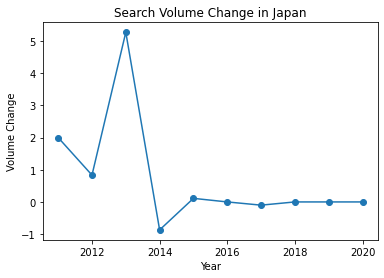

In [34]:
# Did any specific location show a significant increase or decrease in search volume over time?
specific_location ='Japan'
location_volume_change = data[data['location'] == specific_location].groupby('year')['rank'].sum().pct_change()
location_volume_change.plot(kind='line', marker='o', xlabel='Year', ylabel='Volume Change', title='Search Volume Change in ' + specific_location)
plt.show()

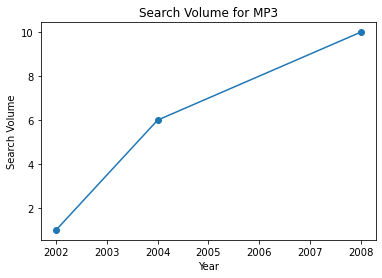

In [36]:
# How did the search volume for a specific query change across different years?
specific_query = 'MP3'
search_volume_by_year = data[data['query'] == specific_query].groupby('year')['rank'].sum()
search_volume_by_year.plot(kind='line', marker='o', xlabel='Year', ylabel='Search Volume', title='Search Volume for ' + specific_query)
plt.show()

In [37]:
# What were the top 10 search queries in a specific year and location?
specific_year = 2020
specific_location = 'Australia'
top_10_queries = data[(data['year'] == specific_year) & (data['location'] == specific_location)]['query'].value_counts().head(10)
print("Top 10 search queries in", specific_year, "and", specific_location + ":")
print(top_10_queries)

Top 10 search queries in 2020 and Australia:
query
US election             2
NBA                     2
Coronavirus             2
Boris Johnson           1
Champions League        1
State of Origin 2020    1
EPL                     1
Sean Connery            1
George Floyd            1
Chadwick Boseman        1
Name: count, dtype: int64


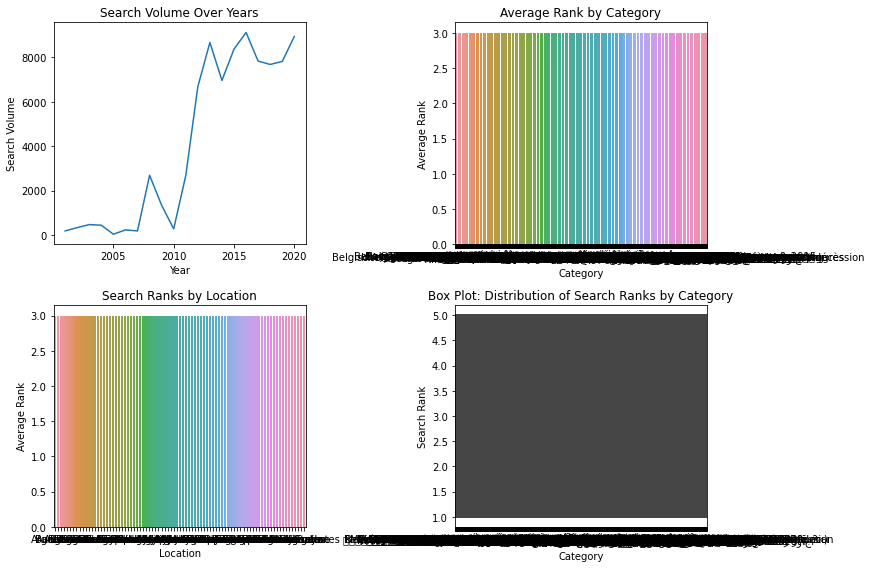

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'data' containing the required data

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# 1. Search Volume Over Years - Line Chart
sns.lineplot(data=data.groupby('year')['rank'].sum(), ax=axes[0, 0])
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Search Volume')
axes[0, 0].set_title('Search Volume Over Years')

# 2. Average Rank by Category - Bar Chart
sns.barplot(x=data.groupby('category')['rank'].mean().index, y=data.groupby('category')['rank'].mean().values, ax=axes[0, 1])
axes[0, 1].set_xlabel('Category')
axes[0, 1].set_ylabel('Average Rank')
axes[0, 1].set_title('Average Rank by Category')

# 3. Search Ranks by Location - Bar Chart
sns.barplot(x=data.groupby('location')['rank'].mean().index, y=data.groupby('location')['rank'].mean().values, ax=axes[1, 0])
axes[1, 0].set_xlabel('Location')
axes[1, 0].set_ylabel('Average Rank')
axes[1, 0].set_title('Search Ranks by Location')

# 4. Box Plot: Distribution of Search Ranks by Category
sns.boxplot(x='category', y='rank', data=data, ax=axes[1, 1])
axes[1, 1].set_xlabel('Category')
axes[1, 1].set_ylabel('Search Rank')
axes[1, 1].set_title('Box Plot: Distribution of Search Ranks by Category')

plt.tight_layout()
plt.show()